In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
print(torch.cuda.is_available())
print(torch.cuda.current_device())

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
!conda install matplotlib seaborn statsmodels pandas tqdm scikit-learn 


^C


In [11]:
# read data and apply one-hot encoding
# data = pd.read_csv("iris.csv", header=None)
# X = data.iloc[:, 0:4]
# y = data.iloc[:, 4:]
# ohe = OneHotEncoder(sparse=False).fit(y)
# # y = ohe.transform(y)

# # from sklearn.preprocessing import OneHotEncoder
# # ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
# # print(ohe.categories_)

# y = ohe.transform(y)
# print(y)

TargetMol_DMSO_PMA_df = pd.read_csv('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv',index_col=0)

    #pd.read_csv('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_DMSO+PMA_HistDiff_concat_UPDATED-20231026.csv',index_col=0)




In [8]:

display(pd.read_csv('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv',index_col=0).head())


,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct]_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast_PMA,Nuclei-Nucleus_Region_Area_[um^2]_PMA,...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2_PMA
Index,,,,,,,,,,,,,,,,,,,,,
DMSO._.NA._.A01._.SP7201,-0.001183,0.000748,0.000127,0.000186,0.000354,0.006467,-0.005407,0.000099,-0.020500,0.008449,...,-0.240982,-0.283609,-0.055801,-0.245371,0.169670,-0.046752,0.000353,0.235398,-0.060292,-0.088151
DMSO._.NA._.A01._.SP7202,-0.001054,-0.012746,-0.002486,-0.006576,0.000193,0.000045,-0.014441,-0.007188,-0.017577,0.015990,...,-0.297422,-0.345183,-0.031406,-0.278377,0.208430,-0.000047,0.000006,0.244385,-0.047646,-0.065632
DMSO._.NA._.A01._.SP7203,-0.001047,-0.002379,0.000004,-0.000647,-0.000440,0.002201,-0.006870,0.000134,-0.012484,0.010209,...,-0.246641,-0.298550,-0.049099,-0.245935,0.185864,-0.045130,0.001602,0.196514,-0.036202,-0.048343
DMSO._.NA._.A01._.SP7204,0.000891,-0.006452,-0.001968,-0.001899,-0.001719,0.010389,-0.012897,-0.003504,-0.004702,0.009413,...,-0.154335,-0.177117,-0.027953,-0.144210,0.123386,-0.000160,-0.000069,0.133873,-0.032752,-0.039716
DMSO._.NA._.A01._.SP7205,0.000366,-0.007824,-0.008492,-0.005391,-0.008540,0.000000,-0.010715,-0.009327,-0.010539,0.005144,...,-0.154292,-0.160605,-0.025120,-0.146287,0.150765,-0.000238,0.000072,0.147292,-0.024461,-0.038410


In [12]:
display(TargetMol_DMSO_PMA_df)

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct]_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast_PMA,Nuclei-Nucleus_Region_Area_[um^2]_PMA,...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2_PMA
Index,,,,,,,,,,,,,,,,,,,,,
DMSO._.NA._.A01._.SP7201,-0.001183,0.000748,0.000127,0.000186,0.000354,0.006467,-0.005407,0.000099,-0.020500,0.008449,...,-0.240982,-0.283609,-0.055801,-0.245371,0.169670,-0.046752,3.526622e-04,0.235398,-0.060292,-0.088151
DMSO._.NA._.A01._.SP7202,-0.001054,-0.012746,-0.002486,-0.006576,0.000193,0.000045,-0.014441,-0.007188,-0.017577,0.015990,...,-0.297422,-0.345183,-0.031406,-0.278377,0.208430,-0.000047,5.690639e-06,0.244385,-0.047646,-0.065632
DMSO._.NA._.A01._.SP7203,-0.001047,-0.002379,0.000004,-0.000647,-0.000440,0.002201,-0.006870,0.000134,-0.012484,0.010209,...,-0.246641,-0.298550,-0.049099,-0.245935,0.185864,-0.045130,1.601523e-03,0.196514,-0.036202,-0.048343
DMSO._.NA._.A01._.SP7204,0.000891,-0.006452,-0.001968,-0.001899,-0.001719,0.010389,-0.012897,-0.003504,-0.004702,0.009413,...,-0.154335,-0.177117,-0.027953,-0.144210,0.123386,-0.000160,-6.939387e-05,0.133873,-0.032752,-0.039716
DMSO._.NA._.A01._.SP7205,0.000366,-0.007824,-0.008492,-0.005391,-0.008540,0.000000,-0.010715,-0.009327,-0.010539,0.005144,...,-0.154292,-0.160605,-0.025120,-0.146287,0.150765,-0.000238,7.235529e-05,0.147292,-0.024461,-0.038410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
well_R._.10uM._.P05._.SP7237,0.000112,0.000221,0.000084,-0.000145,0.000244,0.000246,0.000082,0.000087,-0.001367,-0.000221,...,-0.000087,-0.000864,-0.003054,-0.000094,0.001123,-0.003334,-9.549408e-07,0.003036,-0.000580,-0.000745
T5468._.10uM._.P06._.SP7237,-0.000558,-0.000016,-0.000240,-0.001210,-0.000205,-0.003476,0.000325,-0.000355,-0.002993,-0.005354,...,0.007502,0.005377,-0.008721,0.005234,-0.002536,0.002149,-9.549408e-07,-0.002750,-0.000320,-0.000004
T6603._.10uM._.P07._.SP7237,-0.000031,0.000052,-0.000035,-0.000132,-0.000039,0.000223,-0.000090,-0.000054,-0.000828,0.000630,...,0.000508,-0.000626,-0.002695,0.000129,-0.000510,-0.000141,3.415374e-06,-0.000125,-0.000173,-0.001620


In [13]:
Key = pd.read_csv('../../TargetMol-CP3/TargetMol-CP3/KStest_py_20240125_FeatReductions/reducedKey.csv',index_col='IDname')
# pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [14]:
display(Key['AL_CONSOLIDATED'])

IDname
T6207._.1uM._.F15._.SP7209                                                     CSF3R
T4564._.1uM._.E08._.SP7209            NKCC_(Sodium-Potassium-Chloride_Cotransporter)
T5009._.1uM._.B19._.SP7209                                                  Dopamine
T4687._.1uM._.C12._.SP7209                                        DNA/RNA_Associated
T5039._.1uM._.G01._.SP7209                                                    Others
                                                           ...                      
DMSO_R._.10uM._.E20._.SP7237                                                     NaN
DMSO_R._.10uM._.M13._.SP7237                                                     NaN
Alrestatin_3._.10uM._.M20._.SP7237                                               NaN
LY2109761_2._.10uM._.I06._.SP7237                                                NaN
TCS7004_3._.10uM._.K21._.SP7237                                                  NaN
Name: AL_CONSOLIDATED, Length: 43767, dtype: object

In [15]:
combined = pd.merge(left=TargetMol_DMSO_PMA_df,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)

In [16]:
combined

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct]_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct_PMA,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast_PMA,Nuclei-Nucleus_Region_Area_[um^2]_PMA,...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2_PMA,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2_PMA,AL_CONSOLIDATED
DMSO._.NA._.A01._.SP7201,-0.001183,0.000748,0.000127,0.000186,0.000354,0.006467,-0.005407,0.000099,-0.020500,0.008449,...,-0.283609,-0.055801,-0.245371,0.169670,-0.046752,3.526622e-04,0.235398,-0.060292,-0.088151,NaN
DMSO._.NA._.A01._.SP7202,-0.001054,-0.012746,-0.002486,-0.006576,0.000193,0.000045,-0.014441,-0.007188,-0.017577,0.015990,...,-0.345183,-0.031406,-0.278377,0.208430,-0.000047,5.690639e-06,0.244385,-0.047646,-0.065632,NaN
DMSO._.NA._.A01._.SP7203,-0.001047,-0.002379,0.000004,-0.000647,-0.000440,0.002201,-0.006870,0.000134,-0.012484,0.010209,...,-0.298550,-0.049099,-0.245935,0.185864,-0.045130,1.601523e-03,0.196514,-0.036202,-0.048343,NaN
DMSO._.NA._.A01._.SP7204,0.000891,-0.006452,-0.001968,-0.001899,-0.001719,0.010389,-0.012897,-0.003504,-0.004702,0.009413,...,-0.177117,-0.027953,-0.144210,0.123386,-0.000160,-6.939387e-05,0.133873,-0.032752,-0.039716,NaN
DMSO._.NA._.A01._.SP7205,0.000366,-0.007824,-0.008492,-0.005391,-0.008540,0.000000,-0.010715,-0.009327,-0.010539,0.005144,...,-0.160605,-0.025120,-0.146287,0.150765,-0.000238,7.235529e-05,0.147292,-0.024461,-0.038410,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T5428._.10uM._.P04._.SP7237,-0.000894,0.000289,-0.002071,0.000703,-0.001166,-0.004472,0.001531,-0.000682,0.000495,-0.002129,...,-0.001659,0.008145,0.000170,0.013188,-0.001646,1.830123e-06,0.001779,0.003210,0.001946,Leucine-rich_repeat_kinase_2
T5468._.10uM._.P06._.SP7237,-0.000558,-0.000016,-0.000240,-0.001210,-0.000205,-0.003476,0.000325,-0.000355,-0.002993,-0.005354,...,0.005377,-0.008721,0.005234,-0.002536,0.002149,-9.549408e-07,-0.002750,-0.000320,-0.000004,Epigenetic_Reader_Domain
T6603._.10uM._.P07._.SP7237,-0.000031,0.000052,-0.000035,-0.000132,-0.000039,0.000223,-0.000090,-0.000054,-0.000828,0.000630,...,-0.000626,-0.002695,0.000129,-0.000510,-0.000141,3.415374e-06,-0.000125,-0.000173,-0.001620,Deoxyguanosine_kinase
T5400._.10uM._.P08._.SP7237,0.000430,-0.000076,0.000243,0.000154,0.001001,-0.000022,-0.001700,0.000455,-0.003754,-0.000121,...,0.000371,-0.002490,0.001295,-0.000580,-0.000297,6.050463e-06,0.000547,0.000275,-0.000006,Cytochrome


In [22]:
X = combined.iloc[:, :-1].values
y = combined['AL_CONSOLIDATED'].values.reshape(-1,1)
ohe = OneHotEncoder(sparse_output=False).fit(y)
y = ohe.transform(y)

In [18]:
len(combined['AL_CONSOLIDATED'].unique())

829

In [23]:
# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [24]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


In [34]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
#         self.hidden = nn.Linear(4, 8)
        self.hidden = nn.Linear(5880, 5880)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        # self.act = nn.Tanh()
#         self.hidden2 = nn.Conv1d(5000,2000,kernel_size=2) #
        self.hidden2 = nn.Linear(5880,5880)
        # self.act2 = nn.Tanh()
        self.act2 = nn.ReLU() #
        self.dropout2 = nn.Dropout(0.3)
        self.hidden3 = nn.Linear(5880,5880) #
        # self.act3 = nn.Tanh()
        self.act3 = nn.ReLU() #
        self.dropout3 = nn.Dropout(0.3)
#         self.hidden4 = nn.Conv1d(1000,500,kernel_size=2) #
        self.hidden4 = nn.Linear(5880,2940)
        # self.act4 = nn.Tanh()
        self.act4 = nn.ReLU() #
        self.dropout4 = nn.Dropout(0.3)
#         self.hidden5 = nn.Conv1d(500,366,kernel_size=2) #
        self.hidden5 = nn.Linear(2940,1470)
        self.act5 = nn.Tanh()
        self.dropout5 = nn.Dropout(0.3)
        # self.act5 = nn.ReLU() #
        self.hidden6 = nn.Linear(1470,829)
        self.act6 = nn.Tanh()
        self.soft_max = nn.Softmax() #
        self.output = nn.Linear(829, 829) #8,3

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.dropout(x)
        x = self.act2(self.hidden2(x)) #
        x = self.dropout2(x)
        x = self.act3(self.hidden3(x)) #
        x = self.dropout3(x)
        x = self.act4(self.hidden4(x)) #
        x = self.dropout4(x)
        x = self.act5(self.hidden5(x)) #
        x = self.dropout5(x)
        x = self.act6(self.hidden6(x)) #
#         x = self.act2(self.hidden2(x)) #
        x = self.output(x)
        x = self.soft_max(x) #
        return x

In [35]:
# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 10
batch_size = 16 #50
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

In [39]:
torch.cuda

TypeError: 'str' object is not callable

In [36]:
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0:   0%|          | 0/863 [00:00<?, ?batch/s]c:\ProgramData\Miniconda3\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Epoch 0:   5%|▌         | 47/863 [00:24<07:03,  1.93batch/s, acc=0.0625, loss=6.66]


KeyboardInterrupt: 

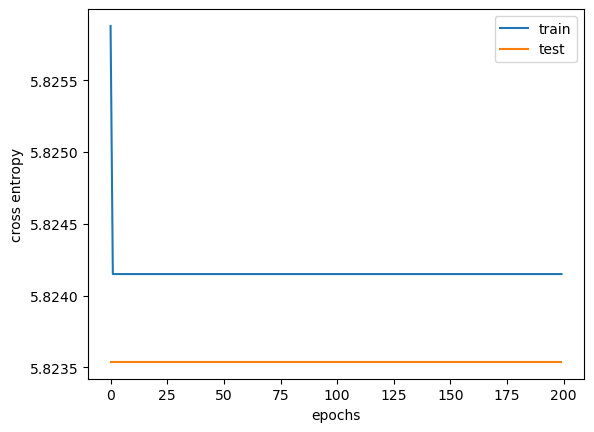

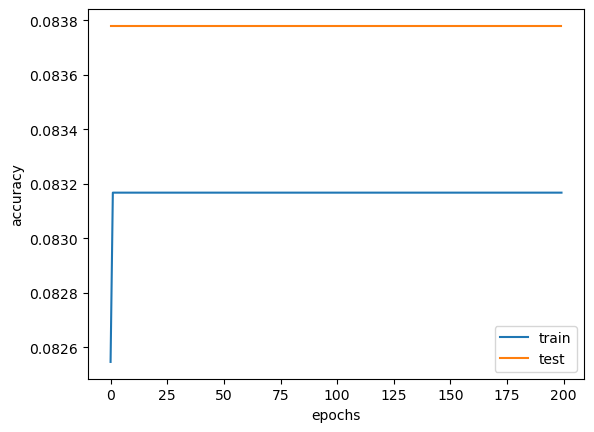

In [46]:


# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()